In [1]:
pip install speechrecognition nltk transformers torch matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
Device set to use cpu


Say something...
Recognized Text: today was a really good day

VADER Sentiment Scores: {'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.4927}
Transformer Emotion Scores:
  anger: 0.0010
  disgust: 0.0002
  fear: 0.0006
  joy: 0.9547
  neutral: 0.0082
  sadness: 0.0055
  surprise: 0.0298


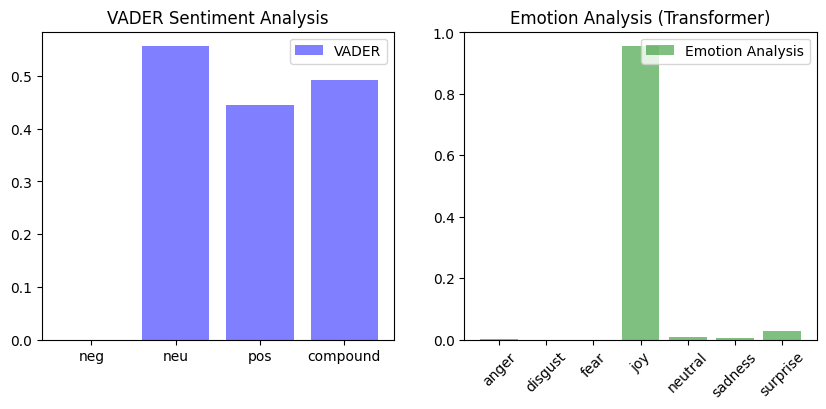

In [8]:
import speech_recognition as sr
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from transformers import pipeline
import matplotlib.pyplot as plt

nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

emotion_pipeline = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", return_all_scores=True)

def analyze_emotion(text):
    """Analyze the sentiment of a given text using both VADER and a Transformer model."""
    vader_scores = sia.polarity_scores(text)
    transformer_scores = emotion_pipeline(text)
    return vader_scores, transformer_scores

def recognize_speech():
    """Capture speech input and convert it to text."""
    recognizer = sr.Recognizer()
    with sr.Microphone() as source:
        print("Say something...")
        recognizer.adjust_for_ambient_noise(source)  
        audio = recognizer.listen(source)
    
    try:
        text = recognizer.recognize_google(audio)
        print("Recognized Text:", text)
        return text
    except sr.UnknownValueError:
        print("Sorry, could not understand the audio.")
    except sr.RequestError:
        print("Could not request results, please check your internet connection.")
    return None

text_input = recognize_speech()
if text_input:
    vader_scores, transformer_scores = analyze_emotion(text_input)
    
    # Display results
    print("\nVADER Sentiment Scores:", vader_scores)
    print("Transformer Emotion Scores:")
    for emotion in transformer_scores[0]:
        print(f"  {emotion['label']}: {emotion['score']:.4f}")
    
    # Plot results
    plt.figure(figsize=(10, 4))

    # Plot VADER sentiment
    plt.subplot(1, 2, 1)
    plt.bar(vader_scores.keys(), vader_scores.values(), color='blue', alpha=0.5, label='VADER')
    plt.title("VADER Sentiment Analysis")
    plt.legend()

    # Plot Transformer emotion scores
    plt.subplot(1, 2, 2)
    labels = [e['label'] for e in transformer_scores[0]]
    scores = [e['score'] for e in transformer_scores[0]]
    plt.bar(labels, scores, color='green', alpha=0.5, label='Emotion Analysis')
    plt.xticks(rotation=45)
    plt.title("Emotion Analysis (Transformer)")
    plt.legend()

    plt.show()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
Device set to use cpu


Say something...
Recognized Text: I don't even have holiday on Sunday

VADER Sentiment Scores: {'neg': 0.311, 'neu': 0.689, 'pos': 0.0, 'compound': -0.3089}
Transformer Emotion Scores:
  anger: 0.0131
  disgust: 0.0185
  fear: 0.0033
  joy: 0.0146
  neutral: 0.5886
  sadness: 0.2411
  surprise: 0.1209
Task Recommendation: Proceed with your scheduled tasks as usual.


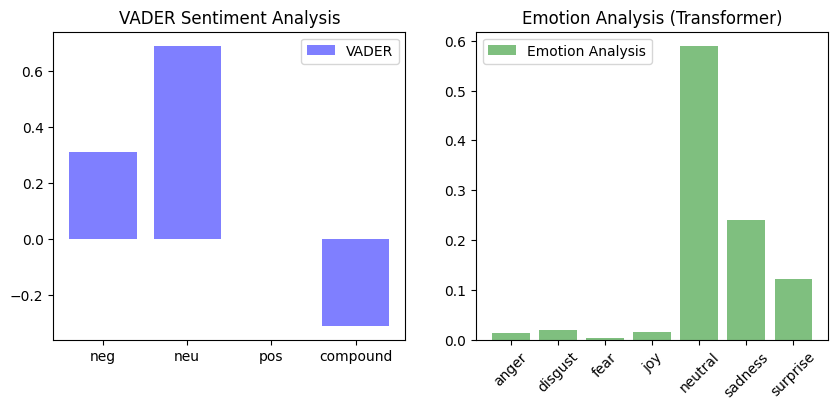

Starting Facial Emotion Detection...
Exiting Facial Emotion Detection...
Logged data to team_mood_log.csv


In [6]:
import speech_recognition as sr
import nltk
import cv2
import pandas as pd
from deepface import DeepFace
from nltk.sentiment import SentimentIntensityAnalyzer
from transformers import pipeline
import matplotlib.pyplot as plt

# Download VADER Lexicon
nltk.download('vader_lexicon')

# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Load Hugging Face Emotion Analysis Model
emotion_pipeline = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", return_all_scores=True)

# Stress-related keywords for speech analysis
STRESS_KEYWORDS = ["tired", "stressed", "overwhelmed", "anxious", "frustrated", "burned out", "exhausted"]

# Task recommendations based on detected emotion
TASK_RECOMMENDATIONS = {
    "happy": "Collaborate with colleagues on a creative task!",
    "sad": "Take a break or work on a simple task to regain focus.",
    "angry": "Try deep breathing before resuming work.",
    "fear": "Seek guidance or reassurance from a mentor.",
    "neutral": "Proceed with your scheduled tasks as usual.",
    "surprise": "Channel your energy into an innovative task!",
    "disgust": "Take a short break to reset your mindset."
}

def analyze_emotion(text):
    """Analyze the sentiment of a given text using both VADER and a Transformer model."""
    vader_scores = sia.polarity_scores(text)
    transformer_scores = emotion_pipeline(text)
    return vader_scores, transformer_scores

def detect_stress(text):
    """Check if the speech text contains stress-related words."""
    text_lower = text.lower()
    for word in STRESS_KEYWORDS:
        if word in text_lower:
            return True
    return False

def recommend_task(emotion):
    """Provide a task recommendation based on detected emotion."""
    return TASK_RECOMMENDATIONS.get(emotion, "If stressed, consider taking a break before continuing.")

def recognize_speech():
    """Capture speech input and convert it to text with improved noise handling."""
    recognizer = sr.Recognizer()
    recognizer.energy_threshold = 400  # Adjust for better noise handling
    with sr.Microphone() as source:
        print("Say something...")
        recognizer.adjust_for_ambient_noise(source, duration=1)  # Improve accuracy
        audio = recognizer.listen(source, timeout=5)  # Set a timeout to avoid long waits
    
    try:
        text = recognizer.recognize_google(audio)
        print("Recognized Text:", text)
        return text
    except sr.UnknownValueError:
        print("Sorry, could not understand the audio. Please try again.")
    except sr.RequestError:
        print("Could not request results, please check your internet connection.")
    return None

def detect_facial_emotion():
    """Detect real-time facial emotion using OpenCV and DeepFace."""
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        print("Error: Could not access webcam")
        return None
    
    dominant_emotion = "neutral"
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: Failed to capture frame")
            break
        
        try:
            analysis = DeepFace.analyze(frame, actions=["emotion"], enforce_detection=False)
            dominant_emotion = analysis[0]['dominant_emotion']
            cv2.putText(frame, f"Emotion: {dominant_emotion}", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        except Exception as e:
            print("Error detecting facial emotion:", e)
            continue  # Skip the current frame and continue the loop
        
        cv2.imshow("Facial Emotion Detection", frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            print("Exiting Facial Emotion Detection...")
            break
    
    cap.release()
    cv2.destroyAllWindows()
    return dominant_emotion

def log_emotion_data(text, speech_emotion, face_emotion, task_recommendation):
    """Log speech and facial emotion data to a CSV file."""
    df = pd.DataFrame([[text, speech_emotion, face_emotion, task_recommendation]],
                      columns=["Speech_Text", "Speech_Emotion", "Face_Emotion", "Task_Recommendation"])
    df.to_csv("team_mood_log.csv", mode='a', header=not pd.io.common.file_exists("team_mood_log.csv"), index=False)
    print("Logged data to team_mood_log.csv")

# Run Speech and Facial Emotion Detection
text_input = recognize_speech()
if text_input:
    # Analyze sentiment
    vader_scores, transformer_scores = analyze_emotion(text_input)
    
    # Detect stress in speech
    is_stressed = detect_stress(text_input)
    if is_stressed:
        print("⚠️ Stress Detected in Speech! Consider taking a break.")
    
    # Display results
    print("\nVADER Sentiment Scores:", vader_scores)
    print("Transformer Emotion Scores:")
    speech_emotion = max(transformer_scores[0], key=lambda e: e['score'])['label']
    for emotion in transformer_scores[0]:
        print(f"  {emotion['label']}: {emotion['score']:.4f}")
    
    # Recommend a task based on speech emotion
    task_recommendation = recommend_task(speech_emotion)
    print(f"Task Recommendation: {task_recommendation}")
    
    # Plot results
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.bar(vader_scores.keys(), vader_scores.values(), color='blue', alpha=0.5, label='VADER')
    plt.title("VADER Sentiment Analysis")
    plt.legend()
    
    plt.subplot(1, 2, 2)
    labels = [e['label'] for e in transformer_scores[0]]
    scores = [e['score'] for e in transformer_scores[0]]
    plt.bar(labels, scores, color='green', alpha=0.5, label='Emotion Analysis')
    plt.xticks(rotation=45)
    plt.title("Emotion Analysis (Transformer)")
    plt.legend()
    plt.show()

print("Starting Facial Emotion Detection...")
face_emotion = detect_facial_emotion()

if text_input and face_emotion:
    log_emotion_data(text_input, speech_emotion, face_emotion, task_recommendation)


In [4]:
import cv2
from deepface import DeepFace

def detect_facial_emotion():
    """Detect real-time facial emotion using OpenCV and DeepFace."""
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        print("Error: Could not access webcam")
        return None
    
    dominant_emotion = "neutral"
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: Failed to capture frame")
            break
        
        try:
            analysis = DeepFace.analyze(frame, actions=["emotion"], enforce_detection=False)
            dominant_emotion = analysis[0]['dominant_emotion']
            cv2.putText(frame, f"Emotion: {dominant_emotion}", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        except Exception as e:
            print("Error detecting facial emotion:", e)
            continue  # Skip the current frame and continue the loop
        
        cv2.imshow("Facial Emotion Detection", frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            print("Exiting Facial Emotion Detection...")
            break
    
    cap.release()
    cv2.destroyAllWindows()
    return dominant_emotion

# Run the facial emotion detection
print("Starting Facial Emotion Detection...")
face_emotion = detect_facial_emotion()
print(f"Detected Facial Emotion: {face_emotion}")


Starting Facial Emotion Detection...
Exiting Facial Emotion Detection...
Detected Facial Emotion: neutral
